In [8]:
import numpy as np
import pandas as pd
import pydotplus
import graphviz
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import time

from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [9]:
admit = pd.read_csv("Admission_Predict.csv")
admit.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
admit_change = admit.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "UniversityRating", "LOR ": "LOR", "Chance of Admit ": "ChanceofAdmit"})
admit_change.head(4)

,Serial No.,GRE,TOEFL,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [11]:
X = admit.drop(['Research', 'Serial No.'],1)
y = admit['Research']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=30)

In [12]:
start_time = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X_train, y_train)
print('It took {0}s seconds to produce the code'.format(time.time() - start_time))

It took 0.0009999275207519531s seconds to produce the code


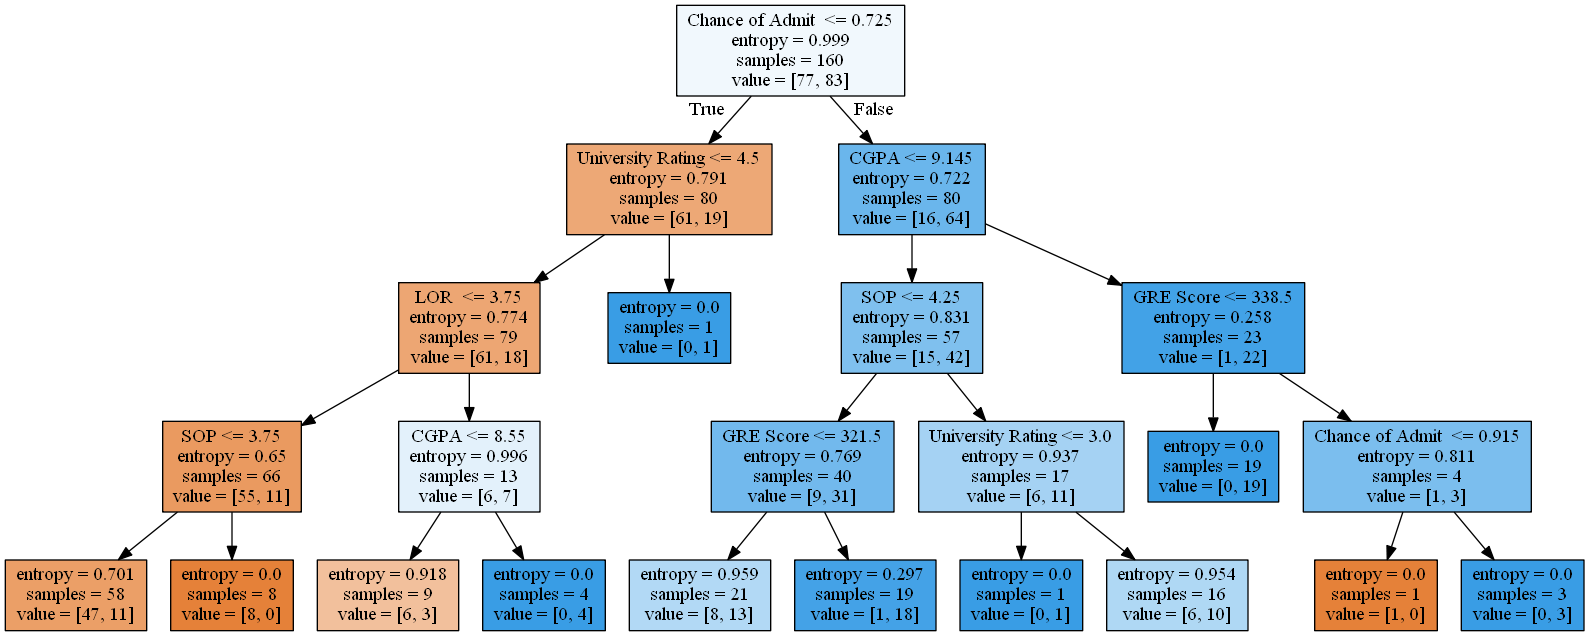

In [13]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())